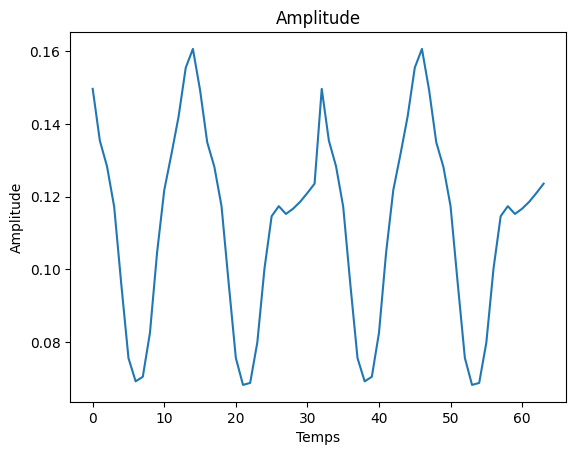

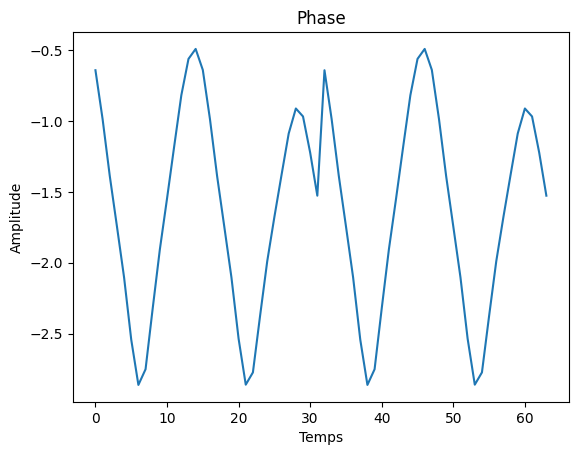

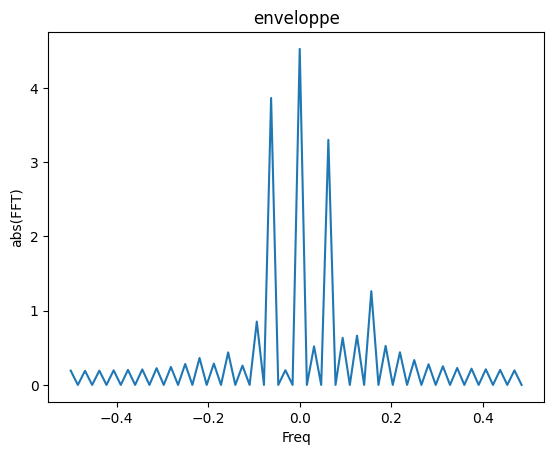

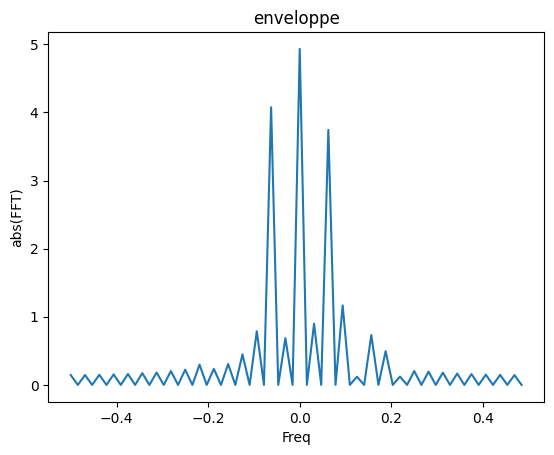

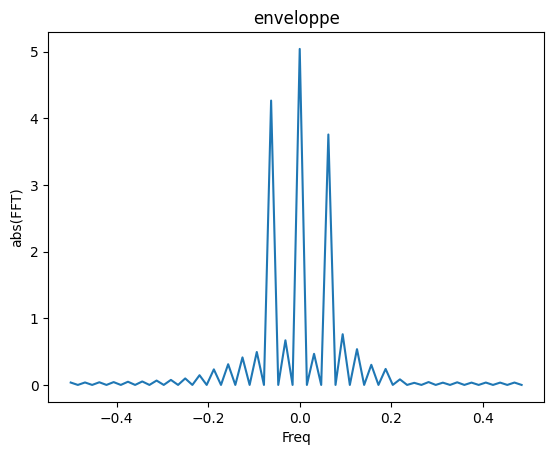

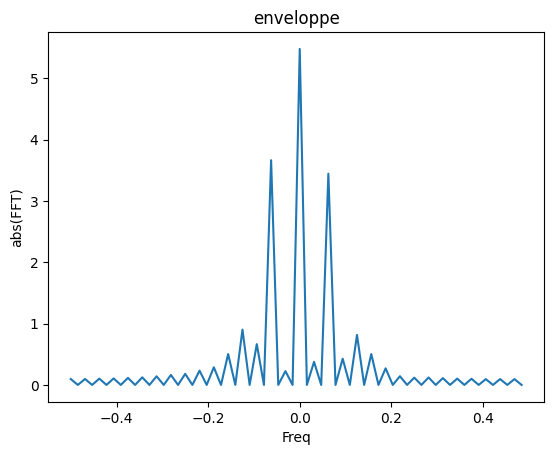

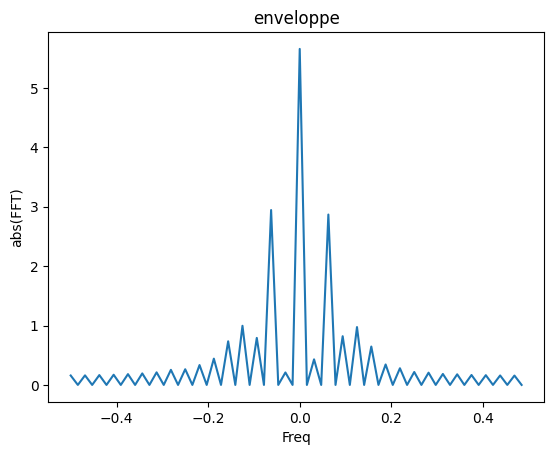

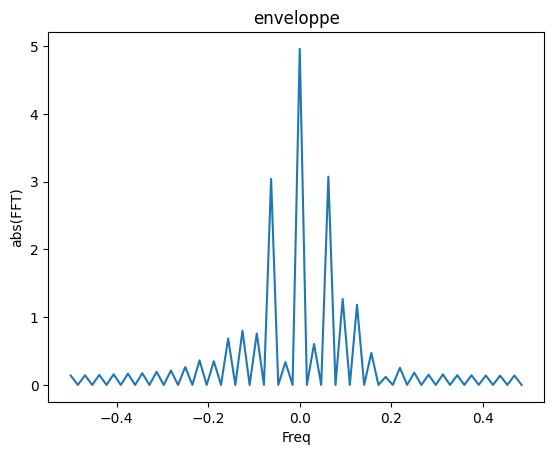

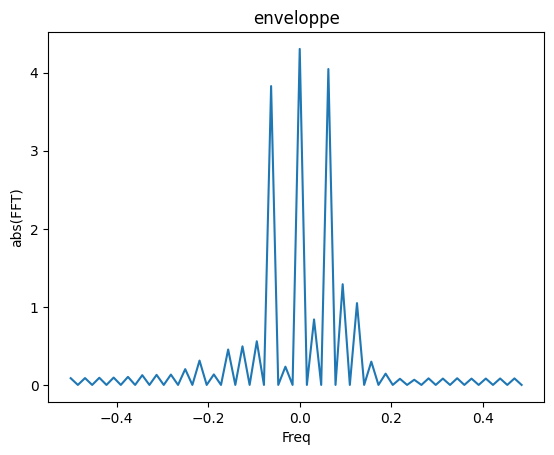

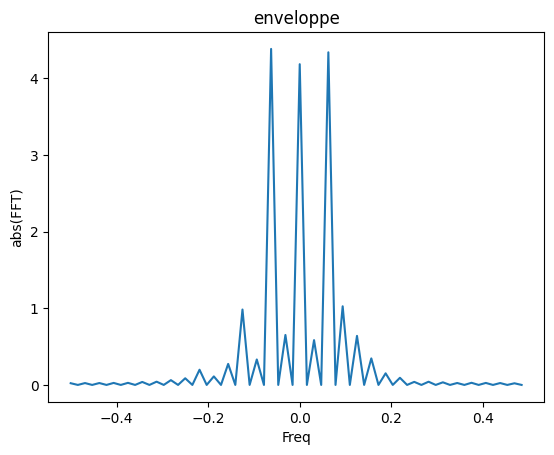

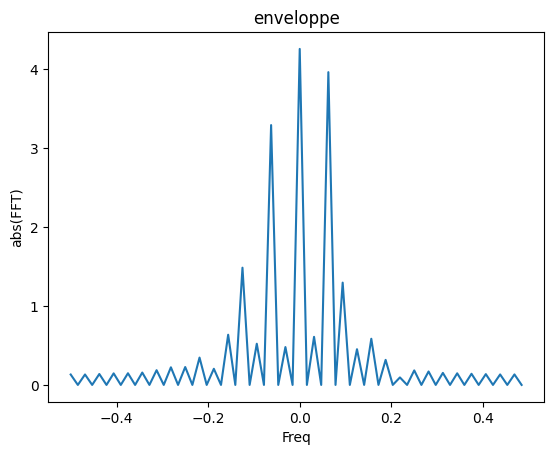

In [29]:
import numpy as np
import matplotlib.pyplot as plt

angle='0'
pts = '32'
a = np.load('a' + angle + '.npy')
p = np.load('p' + angle + '.npy')
c = np.load('c' + angle + '.npy')
T = np.arange(32)
choix = 2 # 0 : 16pts, 1 : 32pts, 2: 64pts



if choix == 0 :    
    # 16 points
    pts = '16'
    a = a[0:16]
    p = p[0:16]
    c = c[0:16]
    T = np.arange(16)
    
    
if choix == 2 :
    # 64 points
    pts = '64'
    a = np.concatenate((a,a))
    p = np.concatenate((p,p))
    c = np.concatenate((c,c))
    T = np.arange(64)
    


#Plot de l'amplitude
plt.plot(T,a)
plt.title('Amplitude')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.show()
#plt.savefig('am0',dpi=240) 
plt.close()


#Plot de la phase        
plt.plot(T,p)
plt.title('Phase')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.show()
#plt.savefig('ph0',dpi=240)
plt.close()


#Plot de la fft       


#sp = np.fft.fft(c)
#freq = np.fft.fftfreq(T.shape[-1])
#sort = np.argsort([freq,sp])
#print(sort)
#plt.plot(sort[0], sort[1])   
#plt.title('FFT')
#plt.xlabel('Freq')
#plt.ylabel('FFT')
#plt.show()
#plt.savefig('cpl0l',dpi=240)
#plt.close()


thêta =['-45','-30','-20','-10','0','10','20','30','45']
T = np.arange(64)
for i in range(9):
    c = np.load('c' + thêta[i] + '.npy')
    if choix == 2 :
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
    sp = np.fft.fft(c, n=64)
    freq = np.fft.fftfreq(T.shape[-1])
    sort = np.argsort([freq,sp])
    vabs = np.abs(sp[sort[0]])
    plt.plot(freq[sort[0]], vabs)   
    plt.title('enveloppe')
    plt.xlabel('Freq')
    plt.ylabel('abs(FFT)')
    #plt.savefig('enveloppe'+ angle +'_'+ pts,dpi=240)
    plt.show()



In [31]:
a = np.array([1,2,3])

a1 = np.concatenate((a,a))

In [17]:
np.shape(c)

(64,)

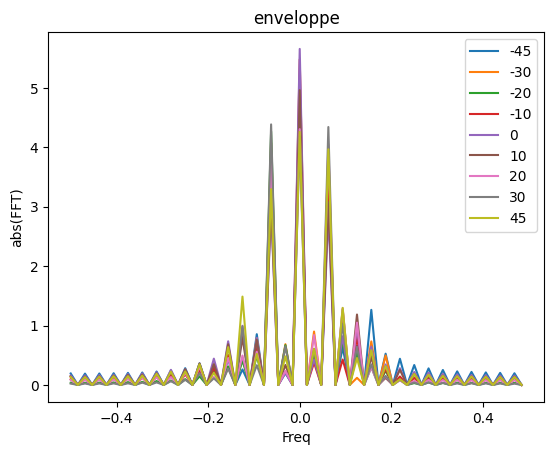

In [33]:
#Plot pour tous les angles sur le même graphique

thêta =['-45','-30','-20','-10','0','10','20','30','45']
l=[]
freq = np.fft.fftfreq(T.shape[-1])

for i in range(9):
    c = np.load('c' + thêta[i] + '.npy')
    if choix == 2 :
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
    sp = np.fft.fft(c,n =64)
    sort = np.argsort([freq,sp])
    vabs = np.abs(sp[sort[0]])
    l.append(vabs)
    

for k in range(9):
    plt.plot(freq[sort[0]], l[k], label = thêta[k])
plt.legend()
plt.title('enveloppe')
plt.xlabel('Freq')
plt.ylabel('abs(FFT)')
plt.savefig('env_ligne',dpi=240)
plt.show()


In [34]:
#Calcul des intégrales symétriques

freq = np.fft.fftfreq(T.shape[-1])
sym=np.zeros([9,2])
thêta =['-45','-30','-20','-10','0','10','20','30','45']
ang =[-45,-30,-20,-10,0,10,20,30,45]
I=[]

for i in range(9):
    c = np.load('c' + thêta[i] + '.npy')
    if choix == 2 :
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
    sp = np.fft.fft(c,n = 64)
    sort = np.argsort([freq,sp])
    freq1 = freq[sort[0]]
    vabs = np.abs(sp[sort[0]])
    
    S=0
    for k in range(63):
        S+=0.5*abs(freq1[k+1]-freq1[k])*(vabs[k]+vabs[k+1])
    I.append(S)
        
print(I)
    
'''    
#Intégrale symétrique 
    S=0
    for k in range(15):
        S+=0.5*abs(freq1[k+1]-freq1[k])*(vabs[k]+vabs[k+1])
    sym[i,0] = S
    
    S=0
    for k in range(16,31):
        S+=0.5*abs(freq1[k+1]-freq1[k])*(vabs[k]+vabs[k+1])
    sym[i,1] = S
    

plt.plot(ang,sym[:,0], label = 'freq <0')
plt.plot(ang,sym[:,1], label = 'freq >0')
plt.legend()
plt.title('Intégrale')
plt.xlabel('angle')
plt.ylabel('int(FFT)')
plt.savefig('Integersym',dpi=240)


'''


#plt.plot(freq1, vabs)
    


[0.3422057310524995, 0.3414994606080712, 0.28883363973371423, 0.3101793289080319, 0.3372126225430267, 0.32801207401462434, 0.3081262322388351, 0.2950873837444289, 0.33089553676443095]


"    \n#Intégrale symétrique \n    S=0\n    for k in range(15):\n        S+=0.5*abs(freq1[k+1]-freq1[k])*(vabs[k]+vabs[k+1])\n    sym[i,0] = S\n    \n    S=0\n    for k in range(16,31):\n        S+=0.5*abs(freq1[k+1]-freq1[k])*(vabs[k]+vabs[k+1])\n    sym[i,1] = S\n    \n\nplt.plot(ang,sym[:,0], label = 'freq <0')\nplt.plot(ang,sym[:,1], label = 'freq >0')\nplt.legend()\nplt.title('Intégrale')\nplt.xlabel('angle')\nplt.ylabel('int(FFT)')\nplt.savefig('Integersym',dpi=240)\n\n\n"

[0.13185472 0.         0.13234982 0.         0.13844599 0.
 0.14642712 0.         0.14796776 0.         0.1568056  0.
 0.18666999 0.         0.22342551 0.         0.22681792 0.
 0.34661266 0.         0.20462017 0.         0.6362562  0.
 1.48651003 0.         0.52247653 0.         3.29450119 0.
 0.48020424 0.         4.26019677 0.         0.60957804 0.
 3.96567774 0.         1.29710882 0.         0.4528728  0.
 0.58524945 0.         0.31764577 0.         0.09500344 0.
 0.18404573 0.         0.17042337 0.         0.15242658 0.
 0.14719031 0.         0.14110725 0.         0.13688589 0.
 0.13286665 0.         0.13301765 0.        ]


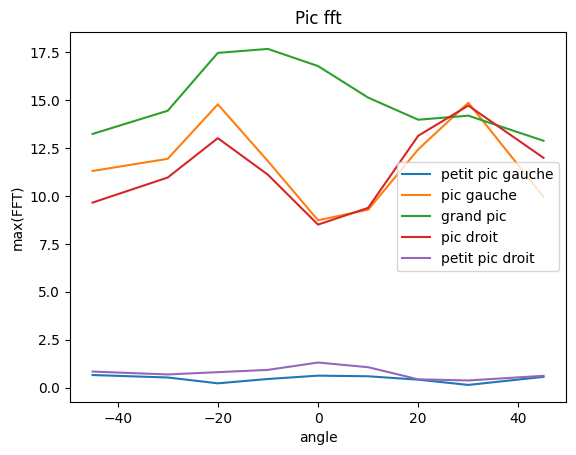

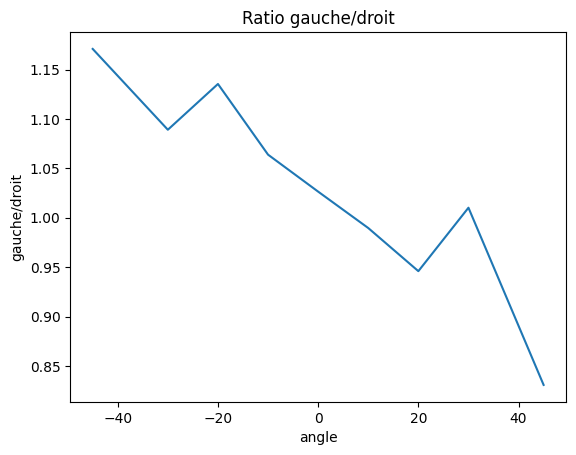

In [66]:
#Calcul des différences entre les pics + normalisation
freq = np.fft.fftfreq(T.shape[-1])
#sym=np.zeros([9,2])
thêta =['-45','-30','-20','-10','0','10','20','30','45']
ang =[-45,-30,-20,-10,0,10,20,30,45]
pic_1=[]
pic_2=[]
pic_3=[]
pic_4=[]
pic_5=[]
R = []

for i in range(9):
    c = np.load('c' + thêta[i] + '.npy')
    if choix == 2 :
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
    sp = np.fft.fft(c,n = 64)
    sort = np.argsort([freq,sp])
    freq1 = freq[sort[0]]
    vabs = np.abs(sp[sort[0]])
    pic_1.append(vabs[12]/I[i])
    pic_2.append(vabs[28]/I[i])
    pic_3.append(vabs[32]/I[i])
    pic_4.append(vabs[36]/I[i])
    pic_5.append(vabs[20]/I[i])
    R.append(vabs[28]/vabs[36])

print(vabs)
    
plt.plot(ang,pic_1, label = 'petit pic gauche')
plt.plot(ang,pic_2, label = 'pic gauche')
plt.plot(ang,pic_3, label = 'grand pic')
plt.plot(ang,pic_4, label = 'pic droit')
plt.plot(ang,pic_5, label = 'petit pic droit')
plt.legend()
plt.title('Pic fft')
plt.xlabel('angle')
plt.ylabel('max(FFT)')
plt.savefig('pic_fft_norm',dpi=240)
plt.show()
plt.close()

plt.plot(ang,R)
plt.title('Ratio gauche/droit')
plt.xlabel('angle')
plt.ylabel('gauche/droit')
plt.savefig('Ratio gauche_droit',dpi=240)
plt.show()


[0.13185472 0.         0.13234982 0.         0.13844599 0.
 0.14642712 0.         0.14796776 0.         0.1568056  0.
 0.18666999 0.         0.22342551 0.         0.22681792 0.
 0.34661266 0.         0.20462017 0.         0.6362562  0.
 1.48651003 0.         0.52247653 0.         3.29450119 0.
 0.48020424 0.         4.26019677 0.         0.60957804 0.
 3.96567774 0.         1.29710882 0.         0.4528728  0.
 0.58524945 0.         0.31764577 0.         0.09500344 0.
 0.18404573 0.         0.17042337 0.         0.15242658 0.
 0.14719031 0.         0.14110725 0.         0.13688589 0.
 0.13286665 0.         0.13301765 0.        ]


Text(0, 0.5, 'gauche/droit')

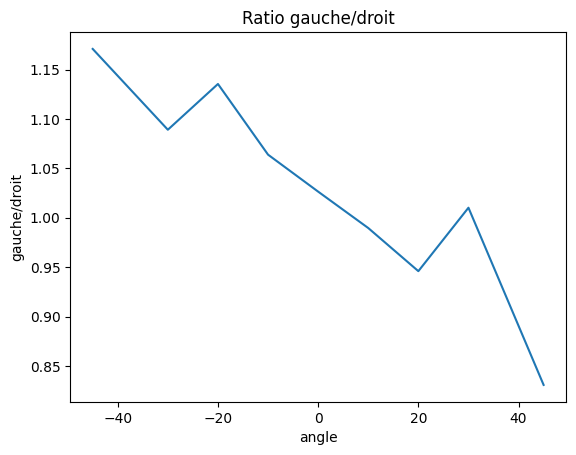

In [64]:
R = []
T = np.arange(64)
freq = np.fft.fftfreq(T.shape[-1])

for i in range(9):
    c = np.load('c' + thêta[i] + '.npy')
    if choix == 2 :
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
        c = np.concatenate((c,c))
    sp = np.fft.fft(c,n = 64)
    sort = np.argsort([freq,sp])
    freq1 = freq[sort[0]]
    vabs = np.abs(sp[sort[0]])
    R.append(vabs[28]/vabs[36]) # pic gauche/pic droit
    
print(vabs)   

plt.plot(ang,R)
plt.title('Ratio gauche/droit')
plt.xlabel('angle')
plt.ylabel('gauche/droit')
#plt.savefig('Ratio gauche/droit',dpi=240)    
    #print(vabs[36])

In [31]:
np.concatenate((c,c,c))

array([-0.09419592+0.00924576j, -0.06788649-0.02491313j,
       -0.04560698-0.06945667j, -0.025742  -0.1018875j ,
        0.00125559-0.10997448j,  0.03902095-0.10044089j,
        0.07880401-0.09072439j,  0.10911394-0.09195706j,
        0.12658604-0.10253097j,  0.12318908-0.11181672j,
        0.0881461 -0.10415868j,  0.02587389-0.07638955j,
       -0.04436604-0.0393982j , -0.09601923-0.00510245j,
       -0.11083311+0.01546322j, -0.09423228+0.00968333j,
       -0.06774415-0.02450421j, -0.04512098-0.06928374j,
       -0.02485679-0.10187376j,  0.00221595-0.10994712j,
        0.04057627-0.10085907j,  0.08359063-0.09142342j,
        0.11877243-0.08759562j,  0.13566373-0.08539519j,
        0.1175718 -0.08484671j,  0.06058556-0.08236506j,
       -0.01449587-0.07625618j, -0.07991997-0.06451638j,
       -0.11267699-0.04511988j, -0.10641465-0.02678591j,
       -0.07440067-0.02833769j, -0.03642383-0.05660645j,
       -0.09419592+0.00924576j, -0.06788649-0.02491313j,
       -0.04560698-0.06945667j,